In [2]:
# http://twiecki.github.io/blog/2013/09/12/bayesian-glms-1/

In [1]:
import pymc3 as pm

import numpy as np
import matplotlib.pyplot as plt
import spacepy.plot as spp

/Users/balarsen/miniconda3/envs/python3/lib/python3.6/site-packages/matplotlib/__init__.py:913: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


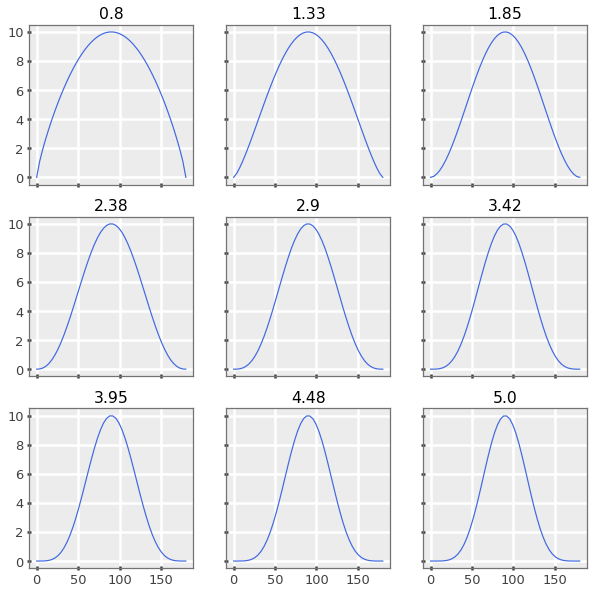

In [12]:


def PA(amp, angles, order=2):
    return amp*np.sin(np.deg2rad(angles))**order

fig, ax = plt.subplots(ncols=3, nrows=3, figsize=(10,10), sharex=True, sharey=True)


ang = np.linspace(0, 180)
anp=10
order=np.linspace(0.8, 5, 9)
ii = 0 
for row in range(3):
    for col in range(3):
        ax[row][col].plot(ang, PA(amp, ang, order[ii]))
        ax[row][col].set_title('{:0.3}'.format(order[ii]))
        ii += 1


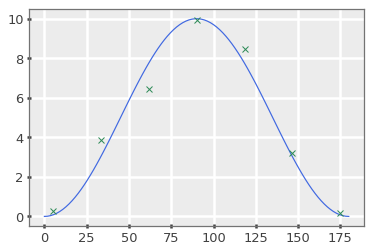

In [83]:
# make some data that follows sin2

angles = np.linspace(5, 175, 7)
amp = 10
order = 2
# add some possion noise to each
np.random.seed(8675309)
nangles = np.random.normal(loc=angles, scale=7.0, size=len(angles))
vals = PA(amp, nangles, order)

plt.plot(np.linspace(0, 180, 100), PA(amp, np.linspace(0, 180, 100), order))
plt.plot(angles, vals, 'x')

In [84]:
noise, add

(array([ 0,  4,  4, 10,  3,  0]), array([ 0, -1,  0, -1, -1,  0]))

In [85]:
data = {'vals':vals, 'angles':angles, 'x':angles}
with pm.Model() as mdl_fish_alt:
    pm.glm.GLM.from_formula('vals ~ x', data)
    trace = pm.sample(3000, njobs=4) # draw 3000 posterior samples using NUTS sampling

    

Auto-assigning NUTS sampler...
Initializing NUTS using ADVI...
Average Loss = 32.193:   9%|▉         | 18868/200000 [00:02<00:25, 7042.14it/s]
Convergence archived at 18900
Interrupted at 18,900 [9%]: Average Loss = 3,623
 99%|█████████▉| 3482/3500 [00:10<00:00, 340.57it/s]/Users/balarsen/miniconda3/envs/python3/lib/python3.6/site-packages/pymc3/step_methods/hmc/nuts.py:456: UserWarning: Chain 0 contains 1 diverging samples after tuning. If increasing `target_accept` does not help try to reparameterize.
  % (self._chain_id, n_diverging))
100%|██████████| 3500/3500 [00:10<00:00, 333.47it/s]
/Users/balarsen/miniconda3/envs/python3/lib/python3.6/site-packages/pymc3/step_methods/hmc/nuts.py:456: UserWarning: Chain 1 contains 1 diverging samples after tuning. If increasing `target_accept` does not help try to reparameterize.
  % (self._chain_id, n_diverging))


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x12a5085f8>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x12e12ee10>]], dtype=object)

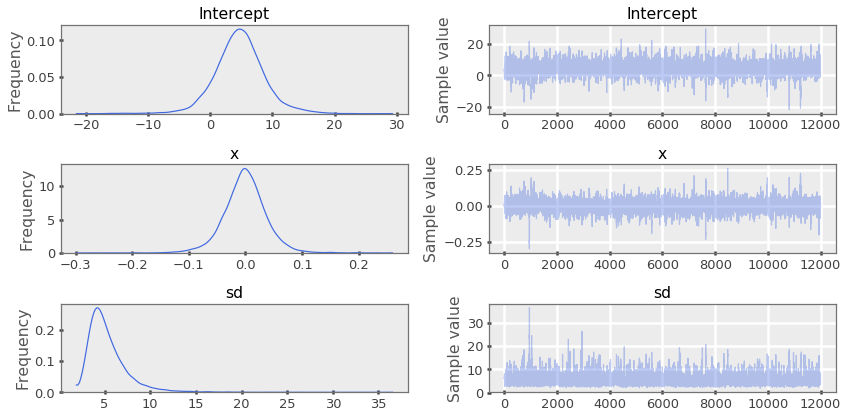

In [86]:
pm.traceplot(trace, combined=True)

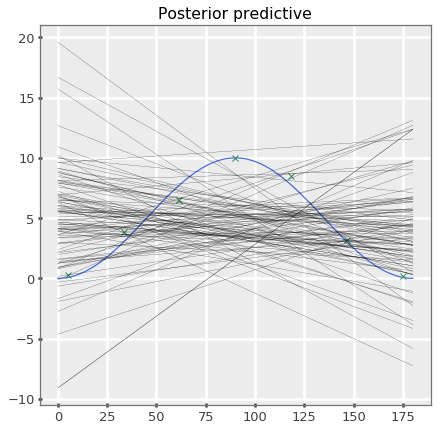

In [87]:

plt.figure(figsize=(7, 7))
plt.plot(np.linspace(0, 180, 100), PA(amp, np.linspace(0, 180, 100), order))
plt.plot(angles, vals, 'x')

pm.plot_posterior_predictive_glm(trace, samples=100, eval=np.linspace(0,180,90),
                              label='posterior predictive regression lines', )
# plt.plot(x, true_regression_line, label='true regression line', lw=3., c='y')



Auto-assigning NUTS sampler...
Initializing NUTS using ADVI...
Average Loss = 21.01:   6%|▌         | 12261/200000 [00:01<00:23, 7886.79it/s] 
Convergence archived at 12600
Interrupted at 12,600 [6%]: Average Loss = 469.16
 99%|█████████▉| 7920/8000 [00:21<00:00, 359.80it/s]/Users/balarsen/miniconda3/envs/python3/lib/python3.6/site-packages/pymc3/step_methods/hmc/nuts.py:456: UserWarning: Chain 1 contains 5 diverging samples after tuning. If increasing `target_accept` does not help try to reparameterize.
  % (self._chain_id, n_diverging))
100%|█████████▉| 7998/8000 [00:22<00:00, 373.82it/s]/Users/balarsen/miniconda3/envs/python3/lib/python3.6/site-packages/pymc3/step_methods/hmc/nuts.py:456: UserWarning: Chain 0 contains 6 diverging samples after tuning. If increasing `target_accept` does not help try to reparameterize.
  % (self._chain_id, n_diverging))
100%|██████████| 8000/8000 [00:22<00:00, 363.09it/s]
/Users/balarsen/miniconda3/envs/python3/lib/python3.6/site-packages/pymc3/step_m

TypeError: object of type 'TensorVariable' has no len()

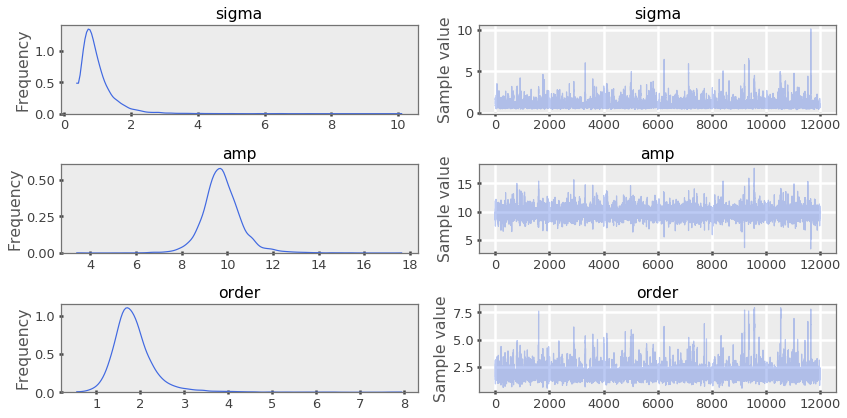

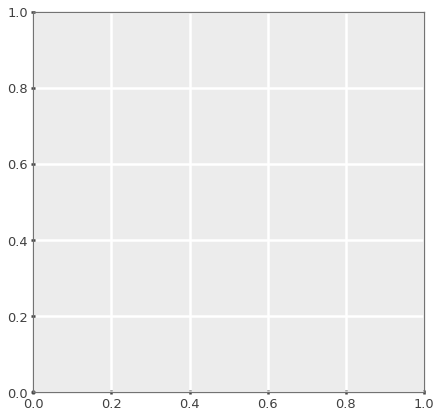

In [88]:
data = {'vals':vals, 'angles':angles, 'x':angles}
with pm.Model() as mdl_fish_alt:
    sigma = pm.HalfCauchy('sigma', beta=10, testval=1.)
    x_coeff = pm.Uniform('amp', 1, 100, )
    order = pm.Uniform('order', 0.5, 8)
    
    # Define likelihood
    likelihood = pm.Normal('y', mu=x_coeff * np.sin(np.deg2rad(data['x']))**order,
                        sd=sigma, observed=data['vals'])

    trace = pm.sample(3000, njobs=4, tune=5000) # draw 3000 posterior samples using NUTS sampling

    
    
pm.traceplot(trace, combined=True) 


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x10b11a400>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x12cffcb38>]], dtype=object)

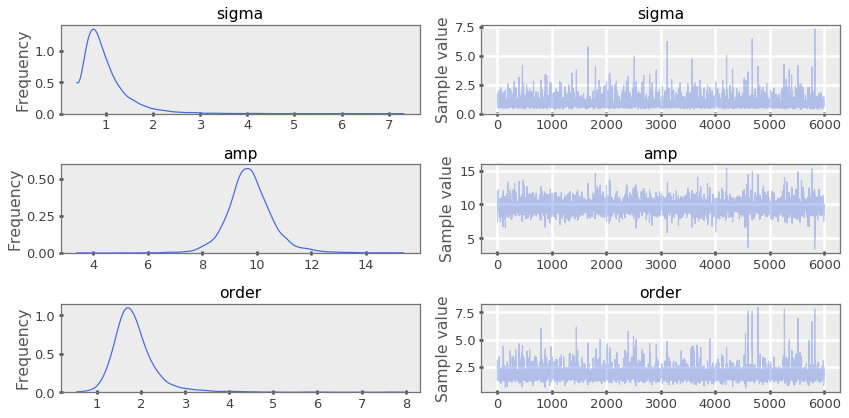

In [89]:
pm.traceplot(trace[::2], combined=True) 


In [90]:
# grab 100 random samples
sami = np.random.random_integers?

In [ ]:
sami = np.random.random_integers

In [91]:
sami = np.random.randint(0, 3000*4, 200)

In [92]:
data

{'angles': array([   5.        ,   33.33333333,   61.66666667,   90.        ,
         118.33333333,  146.66666667,  175.        ]),
 'vals': array([ 0.25140412,  3.86932124,  6.46708935,  9.95379338,  8.48258157,
         3.20993372,  0.18964863]),
 'x': array([   5.        ,   33.33333333,   61.66666667,   90.        ,
         118.33333333,  146.66666667,  175.        ])}

<Container object of 3 artists>

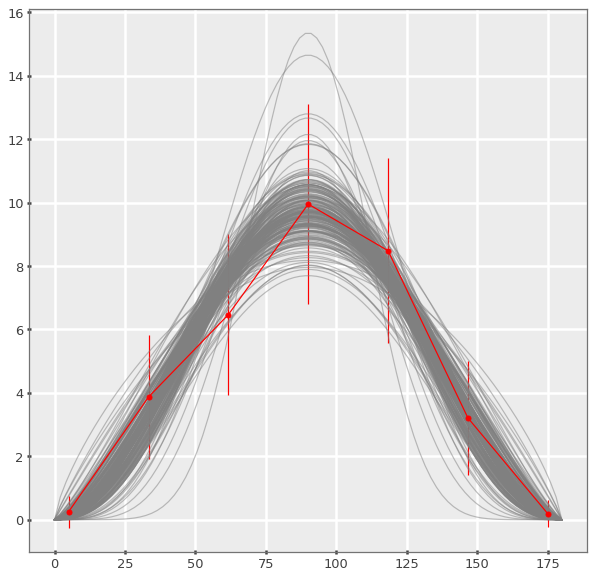

In [96]:
plt.figure(figsize=(10,10))

ampp = trace['amp'][sami]
angp = np.linspace(0,180,90)
orderp = trace['order'][sami]

for aa, oo in zip(ampp, orderp):
    plt.plot(angp, PA(aa, angp, oo), 'grey', alpha=0.5)

plt.errorbar(data['angles'], data['vals'], marker='o', c='r', markersize=5, yerr=np.sqrt(data['vals']))


In [94]:
plt.errorbar?

Auto-assigning NUTS sampler...
Initializing NUTS using ADVI...
Average Loss = 20.284:   8%|▊         | 15576/200000 [00:02<00:27, 6756.26it/s]
Convergence archived at 16200
Interrupted at 16,200 [8%]: Average Loss = 369.92
 99%|█████████▉| 7912/8000 [00:34<00:00, 238.25it/s]/Users/balarsen/miniconda3/envs/python3/lib/python3.6/site-packages/pymc3/step_methods/hmc/nuts.py:456: UserWarning: Chain 1 contains 7 diverging samples after tuning. If increasing `target_accept` does not help try to reparameterize.
  % (self._chain_id, n_diverging))
100%|█████████▉| 7985/8000 [00:35<00:00, 229.94it/s]/Users/balarsen/miniconda3/envs/python3/lib/python3.6/site-packages/pymc3/step_methods/hmc/nuts.py:456: UserWarning: Chain 0 contains 3 diverging samples after tuning. If increasing `target_accept` does not help try to reparameterize.
  % (self._chain_id, n_diverging))
100%|██████████| 8000/8000 [00:35<00:00, 227.35it/s]
/Users/balarsen/miniconda3/envs/python3/lib/python3.6/site-packages/pymc3/step_m

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x12c3534a8>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x130431cf8>]], dtype=object)

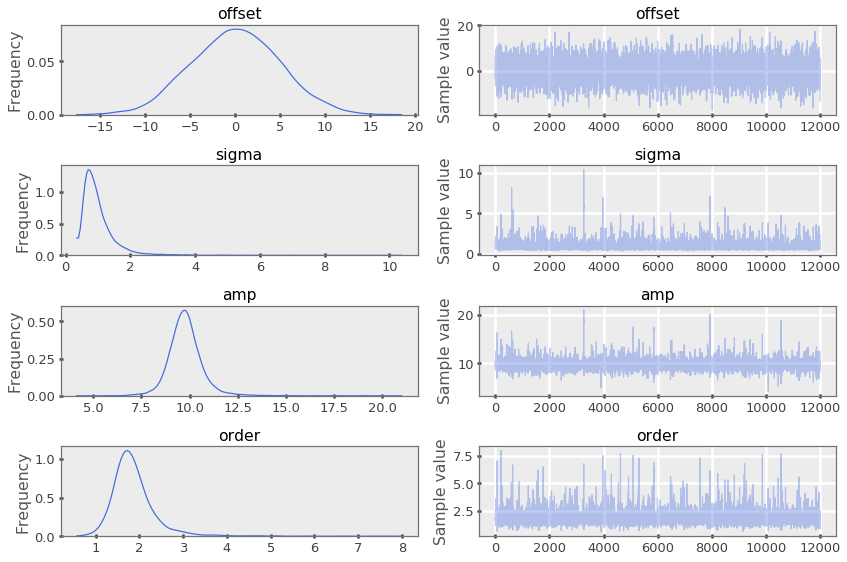

In [97]:
data = {'vals':vals, 'angles':angles, 'x':angles}
with pm.Model() as mdl_fish_alt:
    sigma = pm.HalfCauchy('sigma', beta=10, testval=1.)
    x_coeff = pm.Uniform('amp', 1, 100, )
    order = pm.Uniform('order', 0.5, 8)
    offset = pm.Normal('offset', 0.0, sd=5)
    
    # Define likelihood
    likelihood = pm.Normal('y', mu=x_coeff * np.sin(np.deg2rad(data['x']+np.deg2rad(offset)))**order,
                        sd=sigma, observed=data['vals'])

    trace = pm.sample(3000, njobs=4, tune=5000) # draw 3000 posterior samples using NUTS sampling

    
    
pm.traceplot(trace, combined=True) 


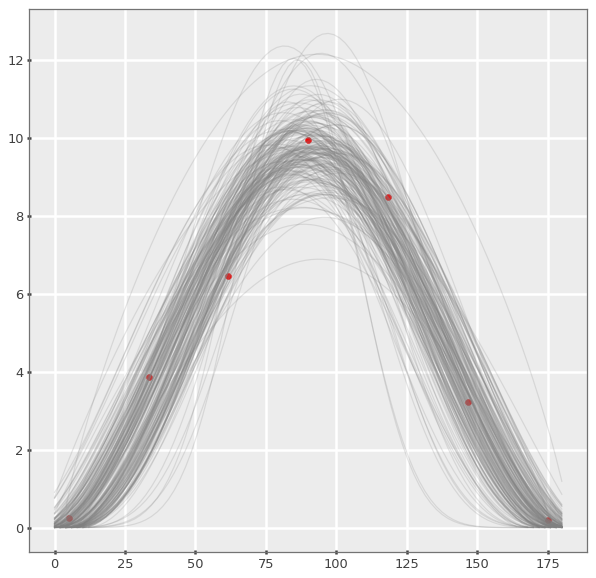

In [118]:
plt.figure(figsize=(10,10))

ampp = trace['amp'][sami]
angp = np.linspace(0,180,90)
orderp = trace['order'][sami]
offsetp = trace['offset'][sami]

for aa, oo, of in zip(ampp, orderp, offsetp):
    plt.plot(angp, PA(aa, angp+of, oo), 'grey', alpha=0.2)

plt.scatter(data['angles'], data['vals'], marker='o', c='r',  )


In [109]:
plt.hist2d(angp, PA(ampp[5:], angp+offsetp[5:], orderp[5:]), bins=20)

ValueError: operands could not be broadcast together with shapes (90,) (195,) 

In [108]:
aa


()